# Optimal Portfolio of a risk-free and two risky assets

## Investors Details

|Expected Return | Risk Aversion | Risk | VaR| Investment Horizon | 
|----------------|---------------|-------|---|-------------------|
|12% | Moderate | 20% | .02| 5 years|

## Risky Assets Selection

### Constants for the market

In [1]:
#risk free rate
rf_rate = .0923
coeff_A = 3.09

### Importing the necessary libraries

In [2]:
import pandas as pd
import missingno as msno
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import seaborn as sns

### Importing historical stocks data of DSE

In [3]:
df = pd.read_csv('../data/total_daily_data.csv', header = 0)
df = df.set_index(pd.to_datetime(df['date'])).drop('date', axis=1)
df.info()

/Users/xebra/Dropbox/portfolio-analysis/sy-portfolio/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 995836 entries, 2019-02-03 to 2019-06-30
Data columns (total 6 columns):
symbol    995836 non-null object
open      995836 non-null float64
high      995836 non-null float64
low       995836 non-null object
close     995836 non-null float64
volume    995835 non-null object
dtypes: float64(3), object(3)
memory usage: 53.2+ MB


In [4]:
df_sorted = df.sort_index()
df_sorted.tail(10)

,symbol,open,high,low,close,volume
date,,,,,,
2019-08-29,BATBC,1224.0,1230.00,1205,1209.80,32499
2019-08-29,METROSPIN,7.7,7.80,7.5,7.60,365479
2019-08-29,IFADAUTOS,70.2,70.20,67.6,67.90,294887
2019-08-29,DSEX,5140.0,5144.96,5093.19,5095.78,4.02918e+07
2019-08-29,TRUSTB1MF,4.2,4.30,4.1,4.20,546418
2019-08-29,IFIC,9.8,9.80,9.6,9.60,467680
2019-08-29,BAYLEASING,15.0,15.00,14.1,14.70,15217
2019-08-29,PROGRESLIF,88.1,90.50,88.1,89.80,3506
2019-08-29,BATASHOE,980.0,980.00,968,978.20,913


symbol,00DS30,00DSEGEN,00DSES,00DSEX,01.Bank,02.Cement,03.Ceramics_Sector,04.Engineering,05.Financial_Institutions,06.Food_&_Allied,...,VAMLBDMF1,VAMLRBBF,VFSTDL,WATACHEM,WMSHIPYARD,WONDERTOYS,YPL,ZAHEENSPIN,ZAHINTEX,ZEALBANGLA
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,1843.18,4342.31,1174.02,4941.52,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,213.5,53.6,68.25,NaN,NaN,16.6,8.5
2015-01-05,1844.42,4342.31,1176.31,4926.41,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,211.6,55.4,68.25,NaN,NaN,16.4,8.4
2015-01-06,1859.07,4342.31,1186.51,4969.67,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,212.5,55.4,68.25,NaN,NaN,16.4,8.5
2015-01-07,1857.15,4342.31,1183.56,4963.66,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,209.3,55.4,68.25,NaN,NaN,16.4,8.3
2015-01-08,1854.14,4342.31,1181.71,4968.71,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,210.1,54.9,68.25,NaN,NaN,16.6,8.3


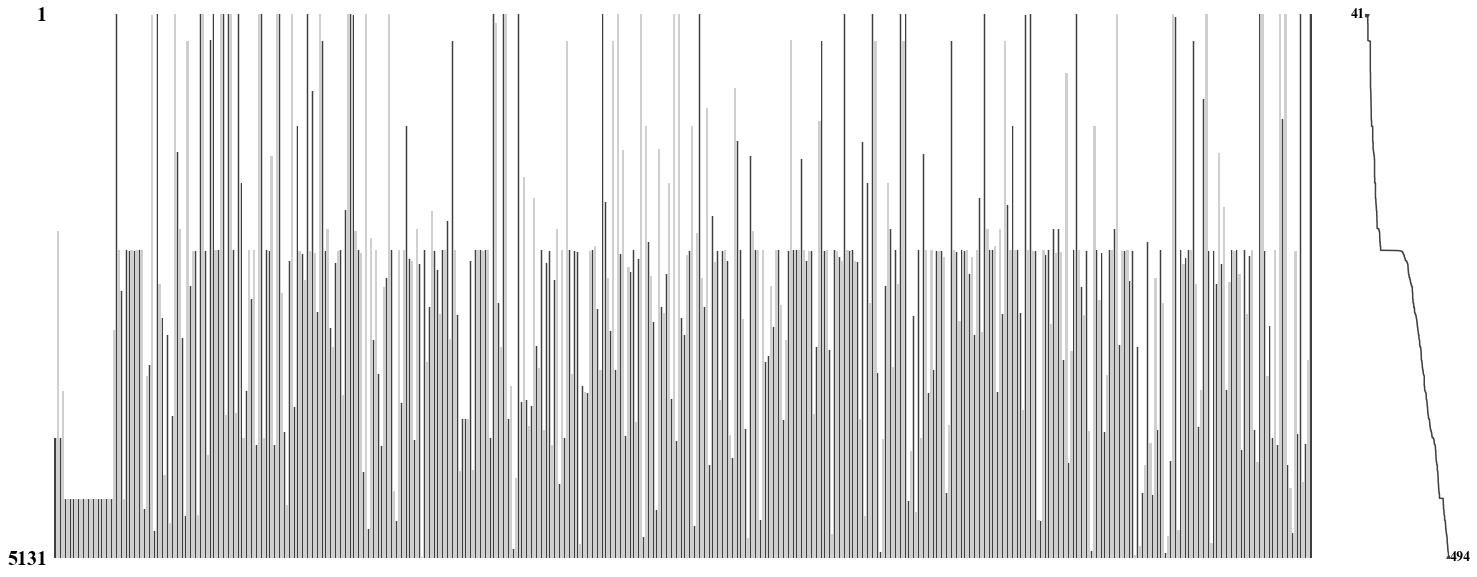

In [5]:
df_pivoted = pd.pivot_table(df_sorted, values='close', index='date', columns='symbol')
df_pivoted = df_pivoted.fillna(method="ffill")
msno.matrix(df_pivoted)
df_pivoted = df_pivoted.loc['2015-01-01':, :]
df_pivoted.head()

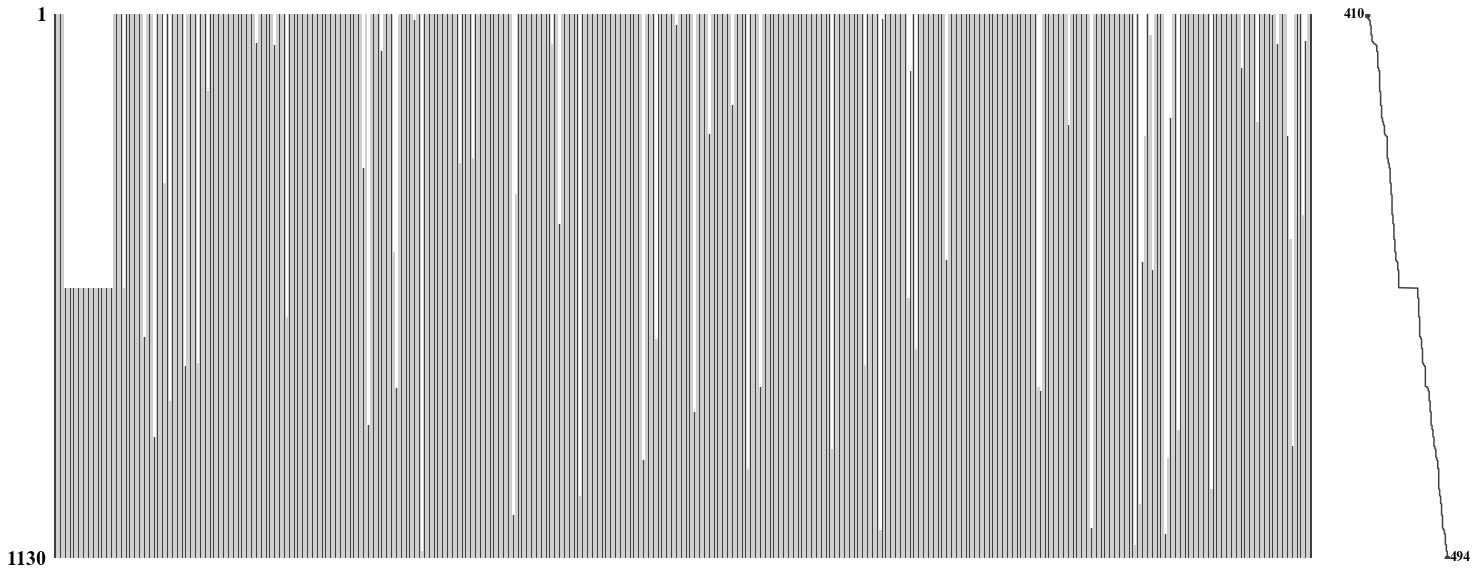

In [6]:
msno.matrix(df_pivoted)

### Calculating returns, standard deviations and sharpe ratios

In [104]:
df_rss = pd.DataFrame(columns=['Symbol', 'Annual Return', 'Standard Deviation', 'Sharpe Ratio']) 
for column in df_pivoted.columns:
    if len(df_pivoted[column].dropna()) > 502: 
        ann_return = (((1+df_pivoted[column].dropna().pct_change(1)).cumprod().iloc[-1])**(251/len(df_pivoted[column].dropna()))) -1 
        ann_std = df_pivoted[column].dropna().pct_change(1).std() * (252**.5)
        shrp = (ann_return - rf_rate) / ann_std
        df_rss = df_rss.append({'Symbol': column, 'Annual Return': ann_return, 'Standard Deviation': ann_std, 'Sharpe Ratio': shrp}, ignore_index= True)
df_rss = df_rss.set_index('Symbol')
top_50 = df_rss.sort_values('Sharpe Ratio', ascending= False).iloc[:15]
top_50_symbol = top_50.index.unique()
top_50

/Users/xebra/Dropbox/portfolio-analysis/sy-portfolio/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


,Annual Return,Standard Deviation,Sharpe Ratio
Symbol,,,
KAY&QUE,0.791988,0.567212,1.233556
STANCERAM,0.663360,0.513062,1.113043
RENWICKJA,0.552351,0.456381,1.008042
AZIZPIPES,0.589325,0.510243,0.974095
BDAUTOCA,0.635915,0.614946,0.884003
MONNOCERA,0.548448,0.572145,0.797260
DAFODILCOM,0.351114,0.387818,0.667360
RAHIMAFOOD,0.411665,0.482135,0.662398
DULAMIACOT,0.519835,0.667017,0.640966


In [8]:
top_50.to_clipboard()

In [9]:
df_corr_cov = df_pivoted.loc[:,top_50_symbol]
df_corr_cov = df_corr_cov.fillna(method='ffill')

In [10]:
corr_matrix= df_corr_cov.pct_change().corr()

In [11]:
corr_matrix.to_clipboard()

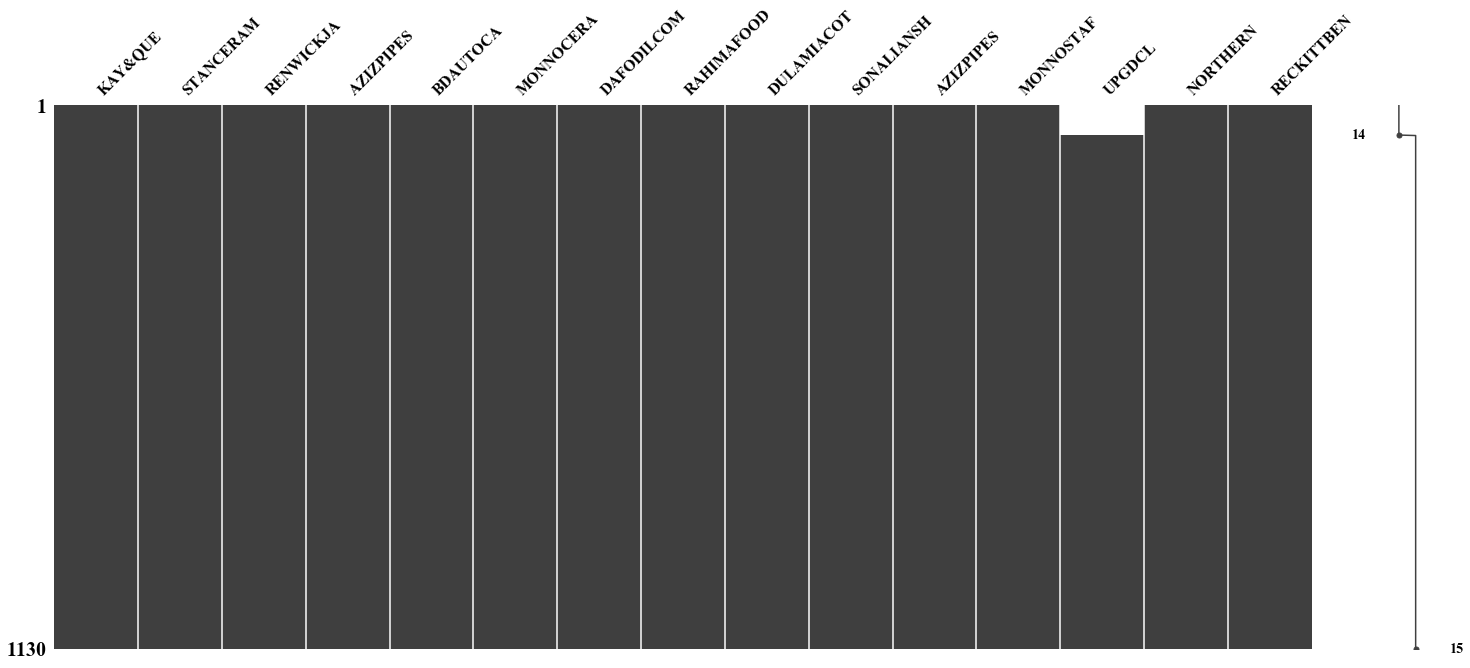

In [12]:
msno.matrix(df_corr_cov)

### Selected Risky Assets

In [13]:
def Portfolio_Return(returns, stds, weights, cov):
    port_df= pd.DataFrame()
    for each in weights:
        port_return = each*returns[0]+(1 - each)*returns[1]
        port_std = np.sqrt(np.square(each*stds[0]) + np.square((1-each)*stds[1]) + 2*each*(1-each)*cov) 
        port_shrp = (port_return - rf_rate ) / port_std
        port_df = port_df.append({'Weights R': each, 'Weights S': 1 - each, 'Portfolio Return': port_return, 'Portfolio Std': port_std, 'Portfolio Sharpe Ratio': port_shrp}, ignore_index=True)
    return port_df

In [14]:
risky_assets = ['UPGDCL', 'MONNOSTAF']
port_assets = df_rss.loc[risky_assets, :]
port_assets.to_clipboard()
port_assets

,Annual Return,Standard Deviation,Sharpe Ratio
Symbol,,,
UPGDCL,0.288286,0.365512,0.536197
MONNOSTAF,0.432571,0.607168,0.560423


In [15]:
correlation =  round(corr_matrix.loc[risky_assets,risky_assets ],2)
correlation.to_clipboard()
correlation

Symbol,UPGDCL,MONNOSTAF
Symbol,,
UPGDCL,1.00,0.01
MONNOSTAF,0.01,1.00


In [16]:
#port_df = pd.DataFrame()
returns_assets = port_assets['Annual Return']
std_assets = port_assets['Standard Deviation']
cov = df_pivoted[risky_assets].pct_change(1).cov().loc[risky_assets[0], risky_assets[1]]
weights = pd.Series(np.arange(0,1.01,.05))
port_df = Portfolio_Return(returns_assets, std_assets, weights, cov)
#weights = pd.Series(np.arange(0,1.01,.01))
#for each in weights:
#    port_return = each*returns_assets[0]+(1 - each)*returns_assets[1]
#    port_std = np.sqrt(np.square(each*std_assets[0]) + np.square((1-each)*std_assets[1]) + 2*each*(1-each)*cov) 
#    port_shrp = (port_return - rf_rate ) / port_std
#    port_df = port_df.append({'Weights R': each, 'Weights S': 1 - each, 'Portfolio Return': port_return, 'Portfolio Std': port_std, 'Portfolio Sharpe Ratio': port_shrp}, ignore_index=True)
port_df.to_clipboard()
port_df

,Portfolio Return,Portfolio Sharpe Ratio,Portfolio Std,Weights R,Weights S
0,0.432571,0.560423,0.607168,0.00,1.00
1,0.425357,0.577121,0.577100,0.05,0.95
2,0.418143,0.594957,0.547674,0.10,0.90
3,0.410928,0.613928,0.519000,0.15,0.85
4,0.403714,0.633976,0.491208,0.20,0.80
5,0.396500,0.654957,0.464458,0.25,0.75
6,0.389286,0.676598,0.438940,0.30,0.70
7,0.382071,0.698445,0.414881,0.35,0.65
8,0.374857,0.719799,0.392550,0.40,0.60
9,0.367643,0.739656,0.372258,0.45,0.55


In [17]:
optimal = port_df.loc[port_df['Portfolio Sharpe Ratio'].idxmax()]
rp_var = (optimal['Portfolio Return'] - rf_rate)/ optimal['Portfolio Std']**2
optimal = optimal.append(pd.Series([rp_var], index=['Risk Premium to VAR']))
optimal = round(optimal, 2)
optimal.to_clipboard()
optimal

/Users/xebra/Dropbox/portfolio-analysis/sy-portfolio/venv/lib/python3.7/site-packages/pandas/io/clipboards.py:117: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  obj.to_csv(buf, sep=sep, encoding="utf-8", **kwargs)


Portfolio Return          0.35
Portfolio Sharpe Ratio    0.78
Portfolio Std             0.33
Weights R                 0.60
Weights S                 0.40
Risk Premium to VAR       2.37
dtype: float64

In [18]:
y = round(optimal['Risk Premium to VAR']/ coeff_A, 2)
y

0.77

Text(0, 0.5, 'Portfolio Return')

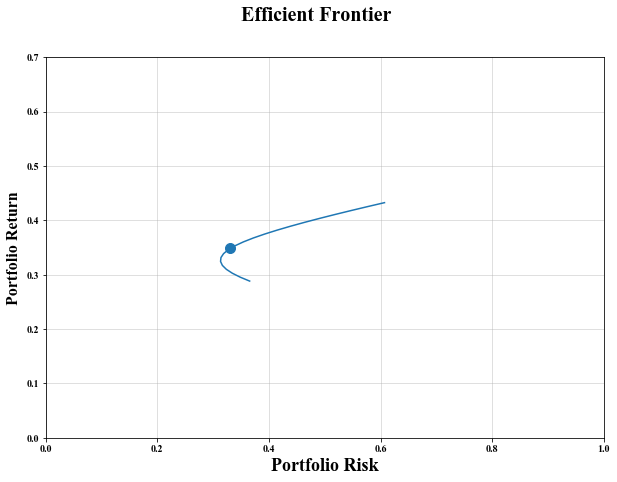

In [19]:
fig = plt.figure(figsize=(10, 7))
plt.grid(which='minor', alpha=.2)
plt.grid(which='major', alpha=.5)
plt.ylim(0, .7)
plt.xlim(0,1)
plt.plot(port_df['Portfolio Std'], port_df['Portfolio Return'])
plt.scatter(optimal['Portfolio Std'], optimal['Portfolio Return'], s=100)
fig.suptitle('Efficient Frontier', fontsize=20)
#text = "optimal portfolio"+str((optimal['Portfolio Std'], optimal['Portfolio Return']))
#plt.text(optimal['Portfolio Std']-.03, optimal['Portfolio Return']+.04,text , fontsize=14)
plt.xlabel('Portfolio Risk', fontsize=18)
plt.ylabel('Portfolio Return', fontsize=16)

Text(0.02, 0.09, 'Risk Free Return')

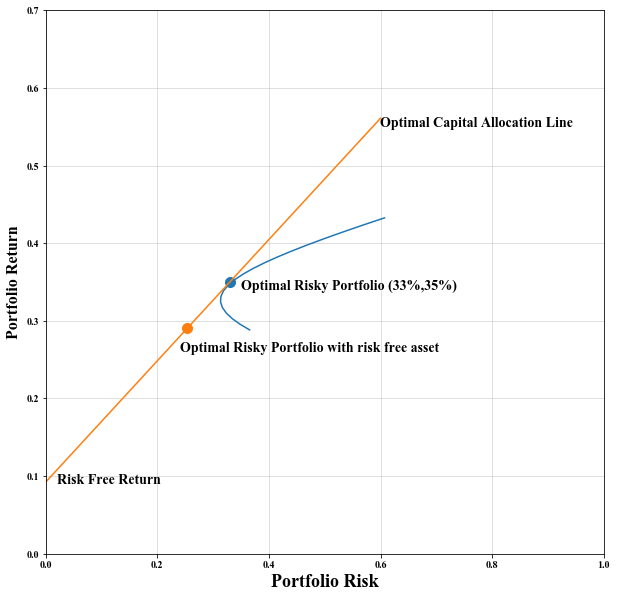

In [20]:
plt.figure(figsize=(10, 10))
plt.grid(which='minor', alpha=.2)
plt.grid(which='major', alpha=.5)
plt.ylim(0, .7)
plt.xlim(0,1)
plt.plot(port_df['Portfolio Std'], port_df['Portfolio Return'])
plt.scatter(optimal['Portfolio Std'], optimal['Portfolio Return'], s=100)
polynomial = np.poly1d(np.polyfit([0,optimal['Portfolio Std']], [rf_rate,optimal['Portfolio Return']], 1))
x_axis = np.linspace(0,.60)
y_axis = polynomial(x_axis)
plt.plot(x_axis, y_axis)
plt.scatter(optimal['Portfolio Std']*y,polynomial(optimal['Portfolio Std']*y), s=100)
plt.xlabel('Portfolio Risk', fontsize=18)
plt.ylabel('Portfolio Return', fontsize=16)
fig.suptitle('Optimal Capital Allocation Line', fontsize=20)
plt.text(.35,.34,"Optimal Risky Portfolio (33%,35%)", fontsize=14)
plt.text(.24,.26,"Optimal Risky Portfolio with risk free asset ", fontsize=14)
plt.text(.6,.55,"Optimal Capital Allocation Line", fontsize=14)
plt.text(.02,.09,"Risk Free Return", fontsize=14)

In [21]:
port_df

,Portfolio Return,Portfolio Sharpe Ratio,Portfolio Std,Weights R,Weights S
0,0.432571,0.560423,0.607168,0.00,1.00
1,0.425357,0.577121,0.577100,0.05,0.95
2,0.418143,0.594957,0.547674,0.10,0.90
3,0.410928,0.613928,0.519000,0.15,0.85
4,0.403714,0.633976,0.491208,0.20,0.80
5,0.396500,0.654957,0.464458,0.25,0.75
6,0.389286,0.676598,0.438940,0.30,0.70
7,0.382071,0.698445,0.414881,0.35,0.65
8,0.374857,0.719799,0.392550,0.40,0.60
9,0.367643,0.739656,0.372258,0.45,0.55


In [22]:
returns_rf = pd.Series([optimal['Portfolio Return'], rf_rate])
std_rf = pd.Series([optimal['Portfolio Std'], 0])
wt = pd.Series(np.arange(0, 1.6, .05))

Risk_Portfolio_rf = Portfolio_Return(returns_rf, std_rf, wt, cov)
Risk_Portfolio_rf

/Users/xebra/Dropbox/portfolio-analysis/sy-portfolio/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


,Portfolio Return,Portfolio Sharpe Ratio,Portfolio Std,Weights R,Weights S
0,0.092300,NaN,0.000000,0.00,1.00
1,0.105185,0.779658,0.016526,0.05,0.95
2,0.118070,0.780316,0.033025,0.10,0.90
3,0.130955,0.780535,0.049524,0.15,0.85
4,0.143840,0.780645,0.066022,0.20,0.80
5,0.156725,0.780711,0.082521,0.25,0.75
6,0.169610,0.780755,0.099020,0.30,0.70
7,0.182495,0.780787,0.115518,0.35,0.65
8,0.195380,0.780810,0.132017,0.40,0.60
9,0.208265,0.780828,0.148515,0.45,0.55


In [96]:
sectors = pd.read_csv('./companies-by-industry.csv')
sectors = sectors.drop(sectors.columns[[0,5]], axis=1)
sectors.columns.values

array(['Bank', 'Cement', 'Ceramics Sector', 'Corporate Bond',
       'Engineering', 'Financial Institutions', 'Food & Allied',
       'Fuel & Power', 'Insurance', 'IT Sector', 'Jute', 'Miscellaneous',
       'Mutual Funds', 'Paper & Printing', 'Pharmaceuticals & Chemicals',
       'Services & Real Estate', 'Tannery Industries',
       'Telecommunication', 'Textile', 'Travel & Leisure'], dtype=object)

banks_performance = df_rss.loc[banks, :]
banks_performance.sort_values('Sharpe Ratio', ascending=False)

### Each Sector Return

In [108]:
sector_return = pd.DataFrame(columns=['Sector', 'Annual Return', 'Risk'])
n=0
for sector in sectors.columns.values:
    n += 1
    print(n)
    companies = sectors[sector].dropna().values
    return_df = df_rss.loc[companies, :] 
    average_return = round(return_df['Annual Return'].mean(), 4)
    average_std = round(np.square(return_df['Standard Deviation']).mean(), 4)
    sector_return = sector_return.append({'Sector':sector, 'Annual Return': average_return, 'Risk': average_std}, ignore_index= True)
sector_return.to_clipboard()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
